# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Gathering Mean Parameters

In [3]:
eps = 0.005 # ...

A  = 181
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
FreqF = 1.0/6.0
Freq  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = TAZ.SpinGroups.make(l, j)
MP2 = TAZ.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

# 1 Spingroup Case:
SGs = TAZ.SpinGroups.make(l[:1], j[:1])
MP1 = TAZ.MeanParameters(Freq=Freq[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], A=A, sg=SGs, EB=EB, FreqF=FreqF)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = MP2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, MP1)
distributions = MP1.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_1, log_total_probability_1 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [6]:
Prior, TPPrior = TAZ.PTBayes(Res, MP2)
distributions = MP2.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_2, log_total_probability_2 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00159
Average Error for False Probability = 0.00197



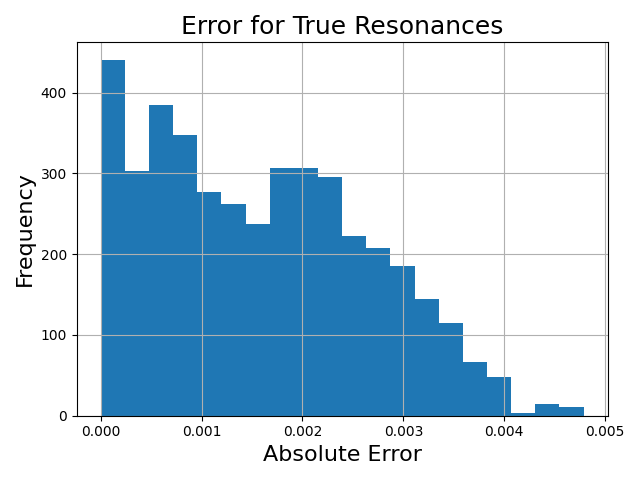

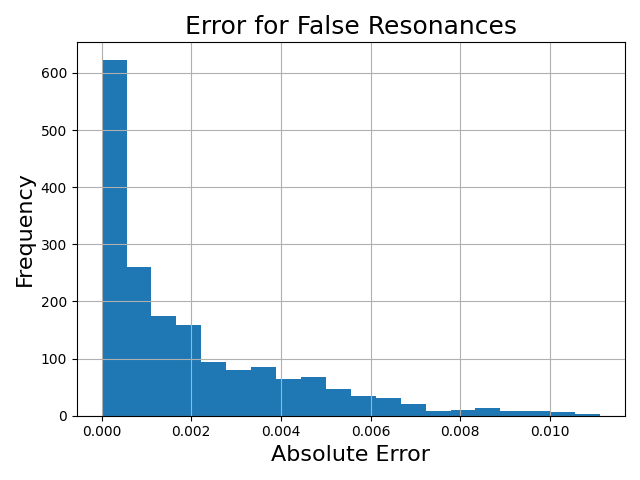

In [7]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [8]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.714128 0.712695]
 [0.493568 0.492   ]
 [0.52242  0.520736]
 [0.610071 0.607915]
 [0.531346 0.529411]
 [0.735771 0.735064]
 [0.83093  0.829384]
 [0.814798 0.814414]
 [0.730753 0.729116]
 ...
 [0.772305 0.770212]
 [0.877773 0.876683]
 [0.882227 0.881465]
 [0.942937 0.942283]
 [0.96428  0.963879]
 [0.945682 0.945051]
 [0.949226 0.948698]
 [0.897959 0.89715 ]
 [0.814477 0.812778]]

False Spingroup Posterior:
[[0.285872 0.284418]
 [0.506432 0.501698]
 [0.47758  0.473266]
 [0.389929 0.387179]
 [0.468654 0.464738]
 [0.264229 0.262373]
 [0.16907  0.168565]
 [0.185202 0.184212]
 [0.269247 0.267876]
 ...
 [0.227695 0.226848]
 [0.122227 0.12177 ]
 [0.117773 0.117364]
 [0.057063 0.05699 ]
 [0.03572  0.035679]
 [0.054318 0.054267]
 [0.050774 0.050694]
 [0.102041 0.101703]
 [0.185523 0.185026]]
